In [87]:
import tensorflow as tf

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

In [88]:
print(tf.__version__)

2.0.0


# STEP 1 : Loading Data
##### The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.

##### x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .

##### y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.
##### Hamre pass 28 by 28 pixels ki images hain

In [89]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()

In [90]:
train_images.shape
#no of rows and columns 60 by 60 hain

(60000, 28, 28)

In [91]:
train_images[0]
#tamam pixels ki range 0 to 255 ha q k rgb ki range itni oti ha
#agr 3nu colors ki max value rakhta tou white bnta ha or zero rakhen tou black bnta ha

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [93]:
print(train_images.ndim)
print(train_images[0].ndim)
print(train_images[0].shape)
print(train_images.shape)
print(train_labels[0])#mtlb zero matrix pe 5 para ua ha
print(test_images.shape)

3
2
(28, 28)
(60000, 28, 28)
5
(10000, 28, 28)


# #STEP 2 : The Network Architecture

In [94]:
from tensorflow.keras import models
from tensorflow.keras import layers
network=models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))#Dense ka matlb fully connected or 2dimention ko 1
#dimension me le aenge and relu func ye krta ha agr 0 se bari value ho tou woi return krta agr o ya ussy kam ho tou 0 krta reurn
#or softmax func hr numbr ko sum kr k probabilty return krt ha jiski sb se bri hogi wo class aegi agr 10 ha tou 10 num ka sum is tarh
network.add(layers.Dense(10,activation="softmax"))

# Step 3: The Network Compile

In [95]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# step 4: The Image data

In [96]:
train_images=train_images.reshape((60000,28*28)) #3 dimension ko 2 dimension row n columns ko multipy kr k ek banana ha
train_images=train_images.astype('float32')/255# 255 se divide isliye kia q k tamam value zero one k betwn ajaengi or compution power kam lageg
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255


# Step 5: Preparing the Labels:

In [97]:
#hmre pass 10 categories hain isliye hm apni type ko category me convert krenge
from tensorflow.keras.utils import to_categorical # one hot i code jiska matlb agr 3 class hain toh abc row me bh or 
#column bh likhunga ab jahan bh a aega me wahn 1 laagaonga or baki jaga zero
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [98]:
network.fit(train_images,train_labels,epochs=5,batch_size=130) #epochs iteration hoti hai and batch_size jo k hmre
#data ko tor tor kr train krta ha like pehle 128 hogA phr is tarah hote rehna 128 multipls
#fit ka mtlb model train krwana hota

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2538 - accuracy: 0.9258
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1042 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0687 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0500 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0378 - accuracy: 0.9885


In [101]:
test_loss,test_acc=network.evaluate(test_images,test_labels) #ye function 2 cheexen return krta ha loss and accuracy


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [102]:
print('test_acc',test_acc)

test_acc 0.9797


In [104]:
network.predict(test_images)[0]

array([2.5611884e-11, 9.7658149e-12, 1.2602756e-06, 4.7953304e-06,
       1.2832593e-14, 3.0279452e-09, 1.2679834e-16, 9.9999392e-01,
       1.8339338e-09, 2.9166282e-08], dtype=float32)

In [105]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.dtype)
print(train_images[0].shape)
print(train_images.shape)

3
uint8
(28, 28)
(60000, 28, 28)


# Displaying the forth digit

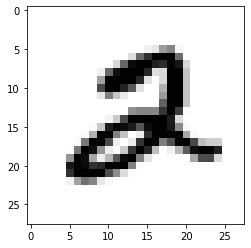

In [109]:
digit=train_images[5]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [110]:
train_labels[5]

2